In [37]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import offsetbox
%matplotlib inline


In [2]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)

(1797, 64)


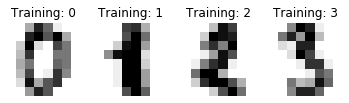

In [3]:
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

#### PCA

Prinicipal Component Analysis

In [4]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [6]:
pca = PCA(n_components=20)

In [7]:
pca_vecs = pca.fit_transform(digits.data)

In [8]:
pca_vecs.shape

(1797, 20)

In [17]:
v = pca.explained_variance_ratio_
print(v.shape)

(20,)


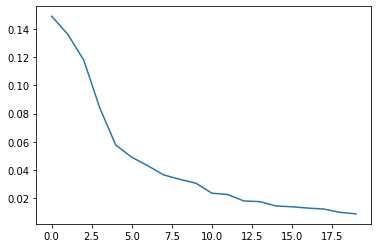

In [18]:
plt.plot(v)

[0.14890594 0.28509365 0.40303959 0.48713938 0.54496353 0.59413263
 0.6372925  0.67390623 0.70743871 0.73822677 0.76195017 0.78467714
 0.80289575 0.82063426 0.83530526 0.84940232 0.86258814 0.87506937
 0.88524644 0.89429926]


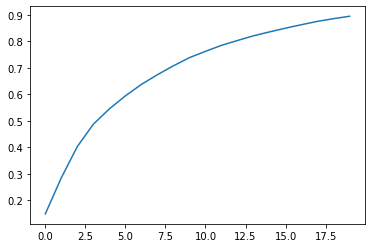

In [20]:
cv = np.cumsum(v)
print(cv)
plt.plot(cv)

In [9]:
from collections import defaultdict

In [21]:
targets = defaultdict(list)
for i,t in enumerate(digits.target):
    targets[t].append(i)


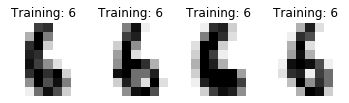

In [24]:
d = 6
for i,index  in enumerate(targets[d][:4]):
    plt.subplot(2, 4, i + 1)
    plt.axis('off')
    plt.imshow(digits.images[index], cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % d)

In [25]:
from sklearn.metrics.pairwise import cosine_similarity

In [35]:
d = 6
idxs = targets[d]
c = cosine_similarity([pca_vecs[idxs[1]]] , [pca_vecs[idxs[3]]])
print(c)

[[0.85890827]]


In [36]:
c2 = cosine_similarity([digits.data[idxs[1]]] , [digits.data[idxs[3]]]) 
print(c2)

[[0.93471666]]


#### TSNE Visualization of Digits dataset

In [40]:

X = digits.data
y = digits.target
n_samples, n_features = X.shape
n_neighbors = 30

# ----------------------------------------------------------------------
# t-SNE embedding of the digits dataset
print("Computing t-SNE embedding")
tsne = TSNE(n_components=2, init='pca', random_state=0)

X_tsne = tsne.fit_transform(X)

Computing t-SNE embedding


In [46]:
# ----------------------------------------------------------------------
# Scale and visualize the embedding vectors
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure(figsize=(10,10))
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(X.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-2:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r),
                X[i])
            ax.add_artist(imagebox)
            
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)


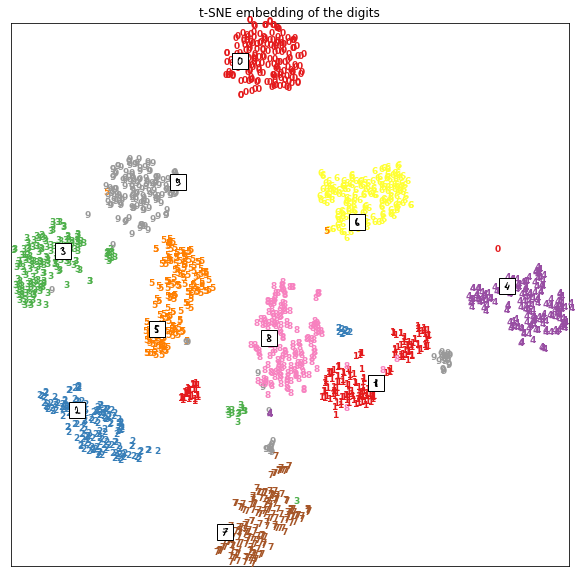

In [47]:
plot_embedding(X_tsne,
               "t-SNE embedding of the digits")